In [1]:
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import cross_validate
import graphviz
import numpy as np

In [2]:
iris = datasets.load_iris()

In [3]:
type(iris)

sklearn.utils.Bunch

In [4]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
print(type(iris.data))
iris.data

<class 'numpy.ndarray'>


array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [9]:
# Fit model
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=None)
clf = clf.fit(iris.data, iris.target)

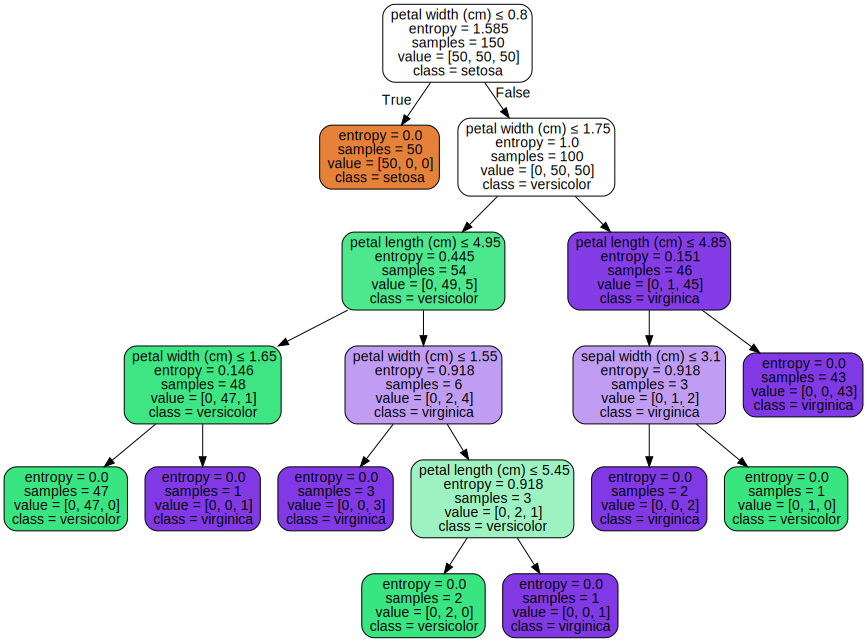

In [10]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [11]:
graph.render('iris_tree_full')

'iris_tree_full.pdf'

In [15]:
# Cross validation
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
scoring = ['precision_weighted', 'recall_weighted', 'f1_weighted']
scores = cross_validate(clf, iris.data, iris.target, scoring=scoring, cv=5, return_train_score=False)

print('Weighted average precision: ', np.mean(scores['test_precision_weighted']))
print('Weighted average recall: ', np.mean(scores['test_recall_weighted']))
print('Weighted average f1 score:', np.mean(scores['test_f1_weighted']))

Weighted average precision:  0.965656565657
Weighted average recall:  0.96
Weighted average f1 score: 0.959697222855


In [16]:
# Method 2: From CSV file
# https://archive.ics.uci.edu/ml/datasets/iris
from datascience import *
iris2 = Table.read_table('iris.csv')

In [86]:
iris2.labels

('Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species')

In [62]:
data_X = iris2.select(0,1,2,3).to_df().as_matrix()
data_y = iris2.select(4).to_df().as_matrix()

In [63]:
print(data_X.shape)
print(data_y.shape)

(150, 4)
(150, 1)


In [78]:
# Fit model
clf2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf2 = clf2.fit(data_X, data_y)

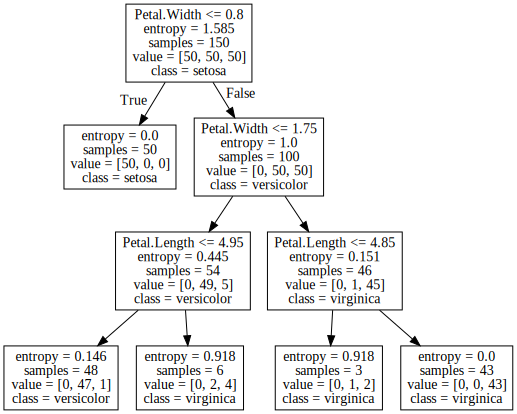

In [89]:
dot_data2 = tree.export_graphviz(clf2, out_file=None, 
                                 feature_names=iris2.labels[:4],
                                 class_names=('setosa', 'versicolor', 'virginica'))
graph = graphviz.Source(dot_data2)
graph

In [88]:
graph.render('iris2_tree')

'iris2_tree.pdf'

In [77]:
# Cross validation
clf2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=None)
scoring = ['precision_weighted', 'recall_weighted', 'f1_weighted']
scores = cross_validate(clf2, data_X, data_y, scoring=scoring, cv=5, return_train_score=False)

print('Weighted average precision: ', np.mean(scores['test_precision_weighted']))
print('Weighted average recall: ', np.mean(scores['test_recall_weighted']))
print('Weighted average f1 score:', np.mean(scores['test_f1_weighted']))

Weighted average precision:  0.96228956229
Weighted average recall:  0.96
Weighted average f1 score: 0.959899749373
